In [2]:
import os
import matplotlib
import numpy as np
import pandas as pd

In [62]:
matplotlib.rcParams['pdf.fonttype'] = 42

In [5]:
metrics =[pd.read_csv('experiments/exp_{}/Eval_{}/overall.csv'.format(i, suffix), index_col=0).rename(columns=lambda x: '{}-exp_{}-{}'.format(x, i, suffix)).dropna()
        for i in range(5) for suffix in ['Independent', 'Transfer_DM', 'Transfer_HM']]
overall = pd.concat(metrics, axis=1)
overall
overall = overall.reset_index().melt(id_vars=['index'], value_vars=overall.columns.tolist(), var_name='metric').dropna()
overall['Experiment'] = overall['metric'].str.split('-').apply(lambda x: '{}'.format( x[3]))
overall['Metric'] = overall['metric'].str.split('-').apply(lambda x: '{}-{}'.format(x[0], x[1]))
overall['Metric'] = pd.Categorical(overall['Metric'].map({'F-max': 'F-max', 'ROC-AUC': 'AUROC'}), categories=['AUROC', 'F-max'])
overall['Experiment'] = pd.Categorical(overall['Experiment'], categories=['Independent', 'Transfer_HM', 'Transfer_DM'])

In [12]:
overall[(overall.Experiment == 'Transfer_DM')&(overall.Metric == 'AUROC')].mean()

value    0.977191
dtype: float64

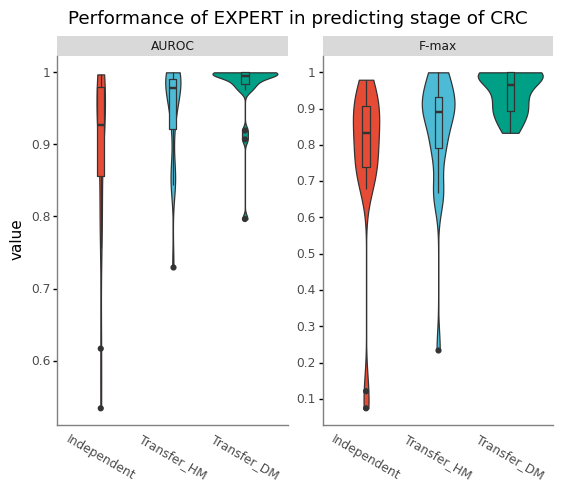

<ggplot: (8793425292382)>


/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Figure_performance_across_models.pdf


In [64]:
from plotnine import *
plot = (ggplot(overall, aes(x='Experiment', y='value', fill='Experiment'))
         + geom_violin(show_legend=False)
         + geom_boxplot(width=0.1, show_legend = False)
         + scale_fill_manual(['#E64B35FF','#4DBBD5FF','#00A087FF','#3C5488FF','#F39B7FFF','#8491B4FF','#91D1C2FF'])
         + theme(axis_title_x=element_blank(), axis_text_x=element_text(rotation=-30, hjust=0.5))
         + theme(panel_grid_major = element_blank(), panel_grid_minor = element_blank(), panel_background = element_blank(), axis_ticks_major_x=element_blank(),
                 axis_line_x = element_line(color="gray", size = 1), axis_line_y = element_line(color="gray", size = 1))
         + scale_y_continuous(breaks=np.arange(11)/10)
         + xlab('Experiment')
         + facet_wrap('Metric', scales='free_y')
         + theme(subplots_adjust={'wspace': 0.15})
         + ggtitle('Performance of EXPERT in predicting stage of CRC')
       )
print(plot)
plot.save('Figure_performance_across_models.pdf', dpi=120, width=6.4, height=4.8)

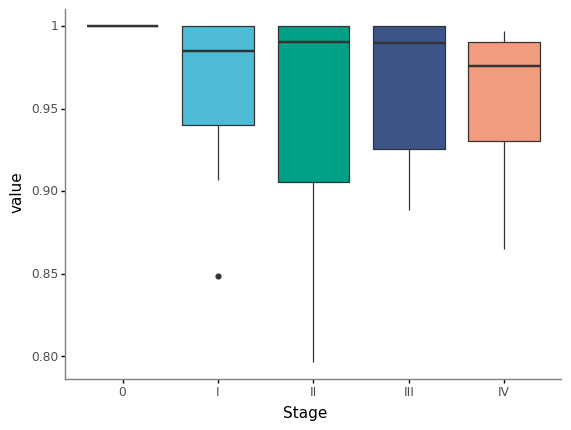

<ggplot: (8793421530537)>


/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 2.4 x 4.8 in image.
/home/chonghui/envs/miniconda3/envs/expert/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: CRC_stage_performance.pdf


In [69]:
from plotnine import *
overall['index'] = overall['index'].str.lstrip('root:CRC (stage').str.rstrip(')')
plot = (ggplot(overall[overall.Experiment == 'Transfer_DM'], aes(x='index', y='value', fill='index'))
         #+ geom_bar(stat='identity', width=0.3, show_legend = False)
         + geom_boxplot(show_legend=False)
         #+ geom_violin()
         + scale_fill_manual(['#E64B35FF','#4DBBD5FF','#00A087FF','#3C5488FF','#F39B7FFF','#8491B4FF','#91D1C2FF'])
         + theme(panel_grid_major = element_blank(), panel_grid_minor = element_blank(), panel_background = element_blank(),
                 axis_line_x = element_line(color="gray", size = 1), axis_line_y = element_line(color="gray", size = 1))
         #+ theme(axis_title_x=element_blank(), axis_text_x=element_text(rotation=-30, hjust=0.5))
         + xlab('Stage')
       )
print(plot)
plot.save('CRC_stage_performance.pdf', dpi=120, width=2.4, height=4.8)

In [4]:
pd.read_csv('dataFiles/CRC_samples_stages.csv').disease_stage.value_counts()

IV     204
I      196
II     126
III     93
0       16
Name: disease_stage, dtype: int64